The Titanic project - Exploratory Data Analysis

In [1]:
#importing the libraries and the Titanic dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#df initially ingests the Titanic data
df = pd.read_csv('train.csv') #read the Titanic data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis

In [2]:
def rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (data[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')   
    
    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [3]:
fare_labels = ['cheap','moderate','expensive','very expensive']
df['Fare bins'] = pd.qcut(x = df['Fare'], q = 4, labels=fare_labels)
age_labels = ['child','young adult','middle age','old']
#bins = pd.IntervalIndex.from_tuples([(0,18),(18,30),(30,40),(40,100)])
df['Age bins'] = pd.cut(df['Age'], bins=[0,18,30,40,100], labels=age_labels)
print(df.loc[:,['Age',"Age bins"]].head(15))
df['Age'].describe()

     Age     Age bins
0   22.0  young adult
1   38.0   middle age
2   26.0  young adult
3   35.0   middle age
4   35.0   middle age
5    NaN          NaN
6   54.0          old
7    2.0        child
8   27.0  young adult
9   14.0        child
10   4.0        child
11  58.0          old
12  20.0  young adult
13  39.0   middle age
14  14.0        child


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

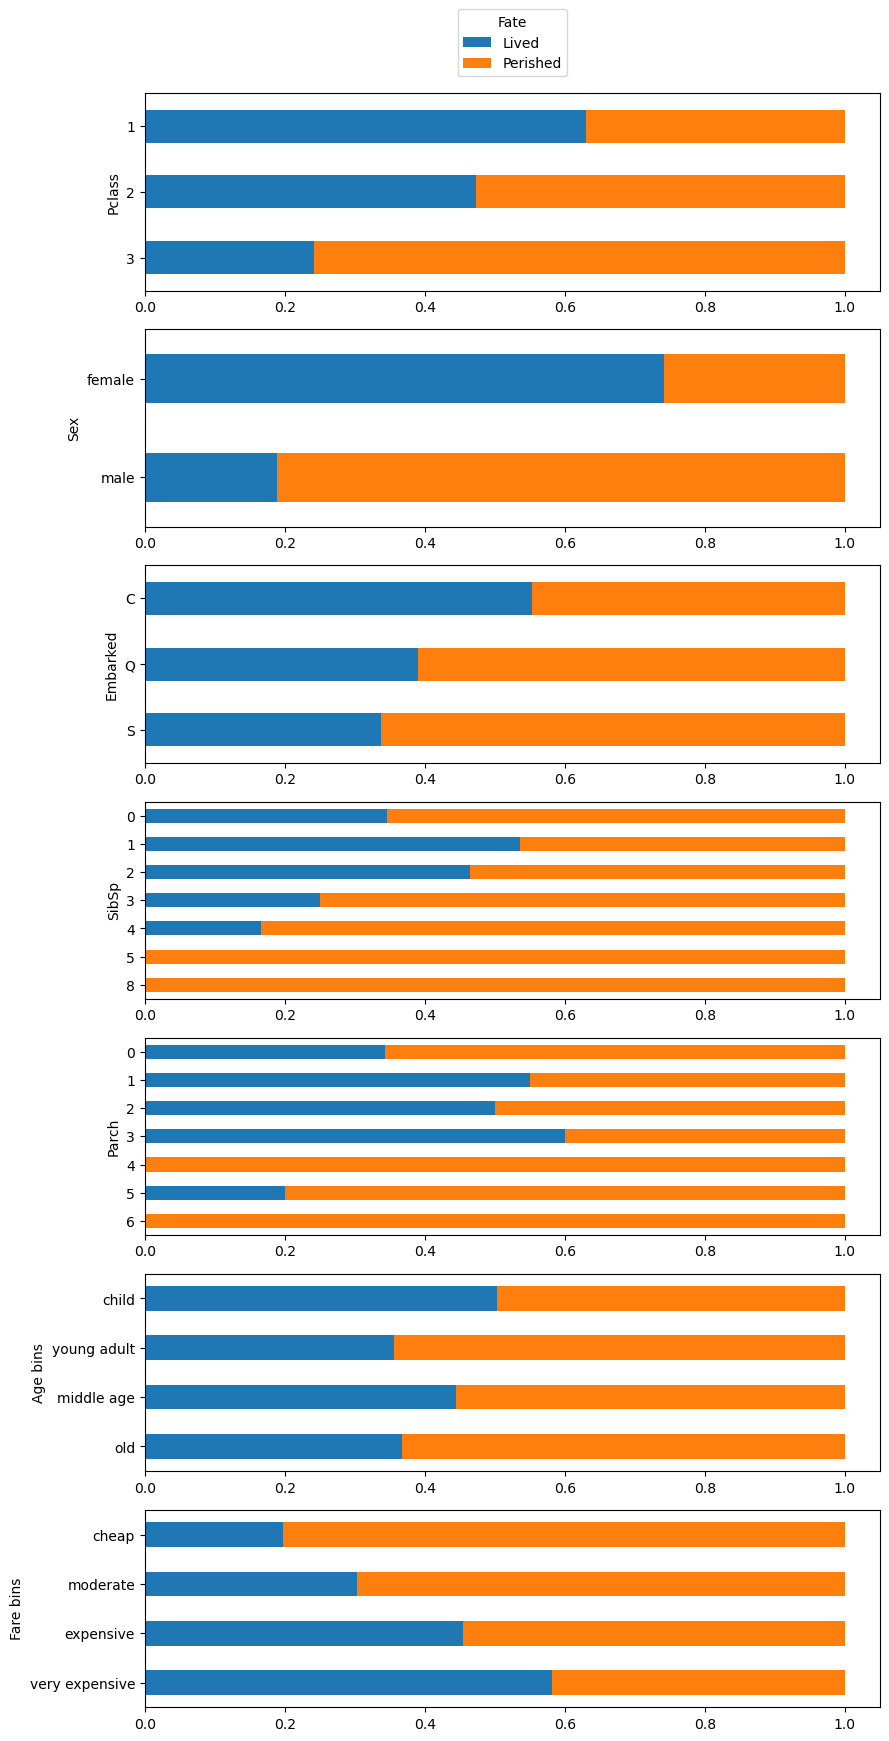

In [4]:
df['Fate'] = 'Perished'
df.loc[df['Survived'] == 1, 'Fate']= 'Lived'

cols_to_plot = [
    'Pclass',
    'Sex',
    #'Age',
    #'Fare',
    'Embarked',
    'SibSp',
    'Parch',
    'Age bins',
    'Fare bins'
]

fig, ax = plt.subplots(
    len(cols_to_plot), figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    rate_plot(
        col, 'Fate', df, ax=ax[idx]
    )

    
ax[0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='Fate'
)
fig.tight_layout()

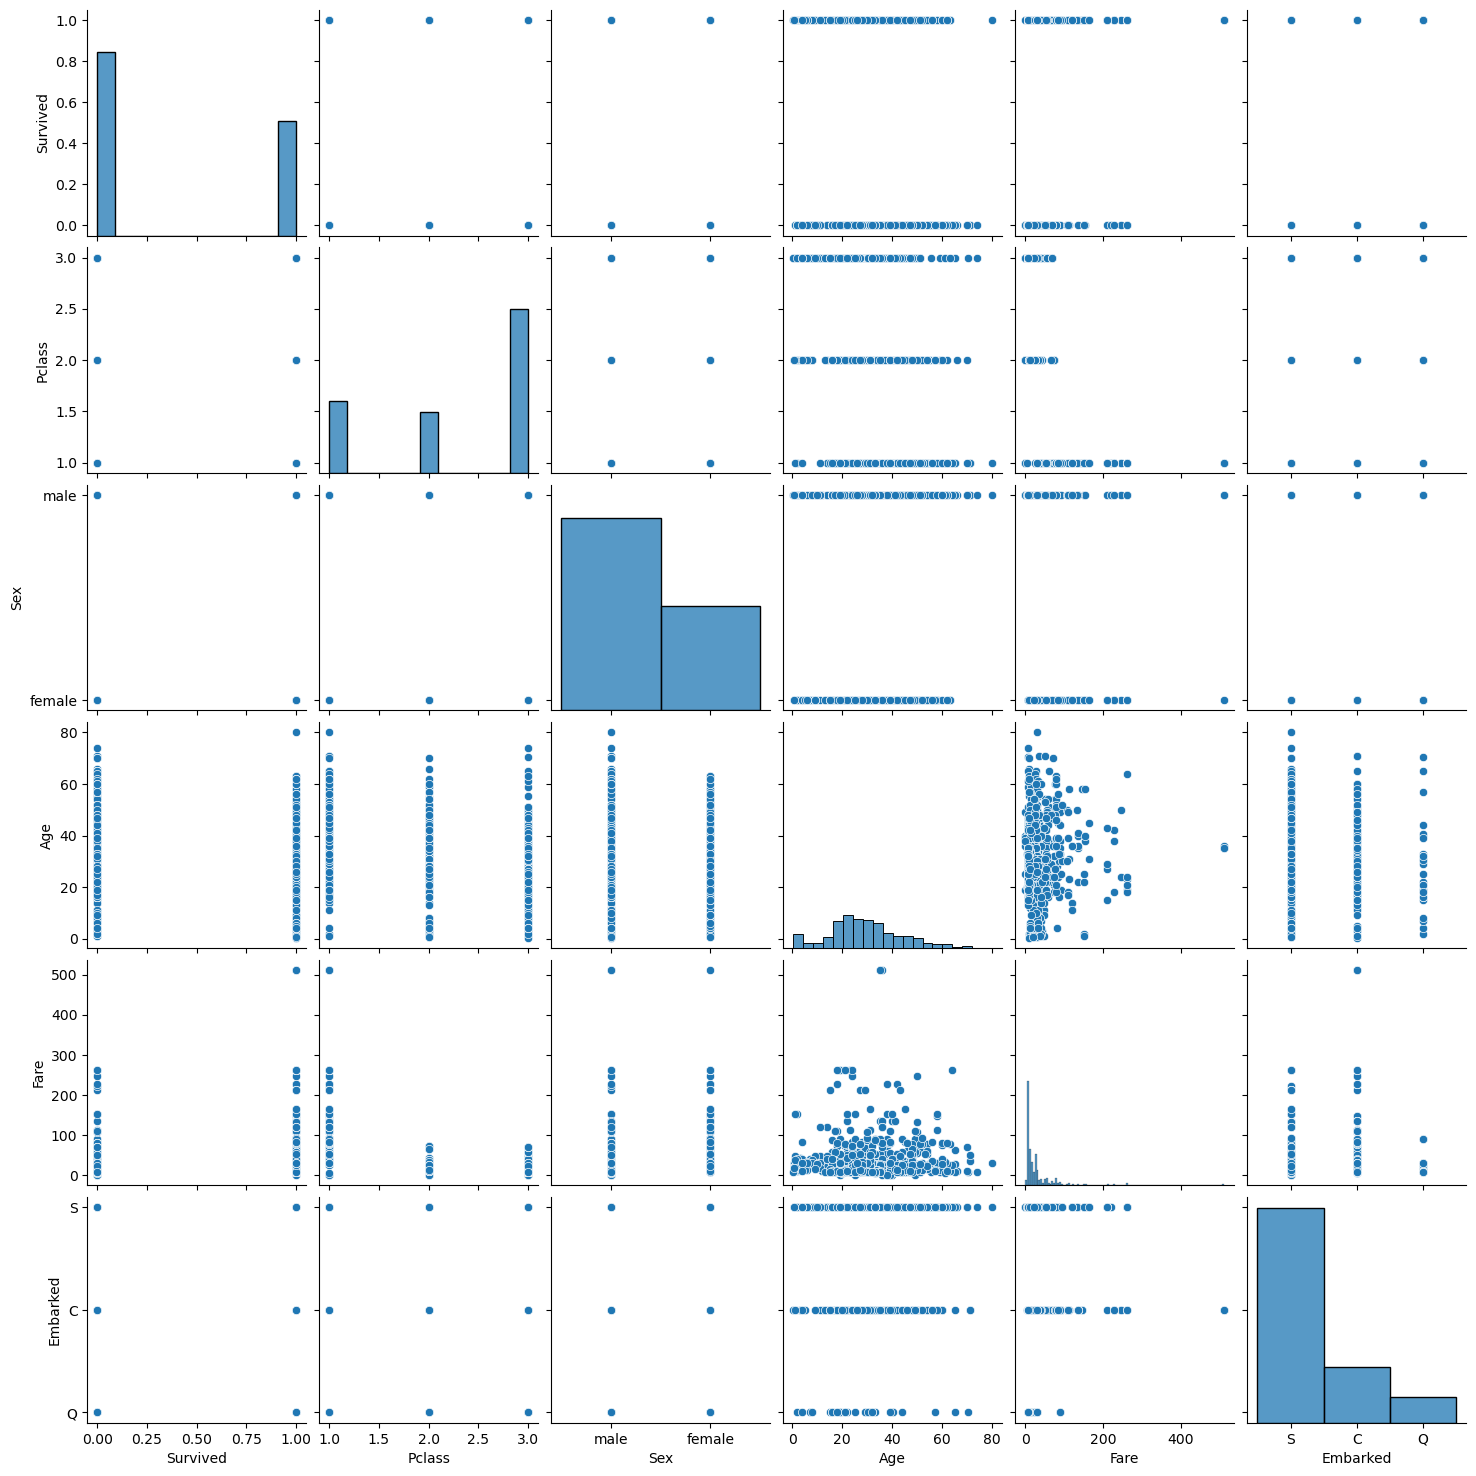

In [5]:
sns.pairplot(data=df, vars = ['Survived', 'Pclass', 'Sex','Age','Fare','Embarked'])
plt.show()

In [6]:
df.isnull().sum() #what fields have null values in them that I need to correct later?

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Fare bins        0
Age bins       177
Fate             0
dtype: int64

In [7]:
print(df.Embarked.mode())
print(df.Fare.mean())
print(type(df.Fare))
df.Fare.sort_values()

0    S
Name: Embarked, dtype: object
32.2042079685746
<class 'pandas.core.series.Series'>


271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64

Running a categorical count bar chart on survival rates of the different Passenger Classes

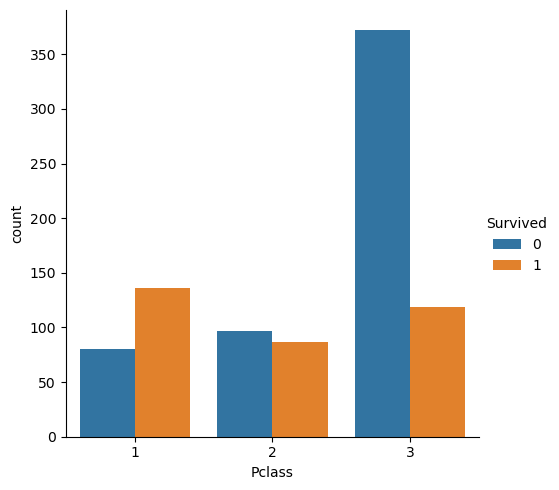

In [8]:
sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = df)
plt.show()

It appears that First Class passengers are more likely to have survived and Third Class passengers are more likely to have perished

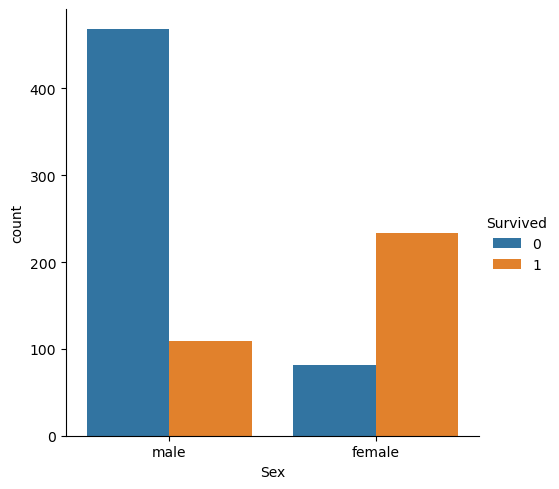

In [9]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)
plt.show()

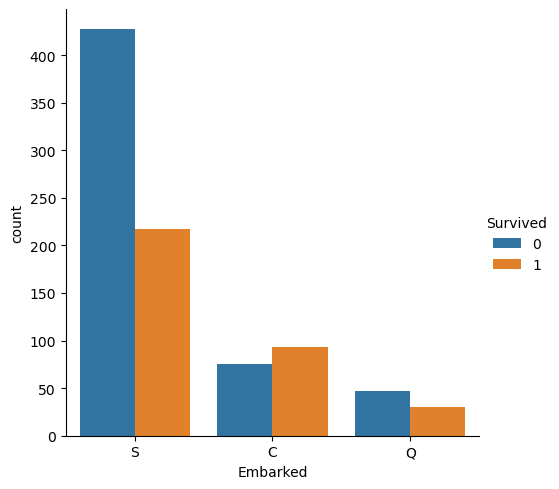

In [10]:
sns.catplot(x ="Embarked", hue ="Survived",
kind ="count", data = df)
plt.show()

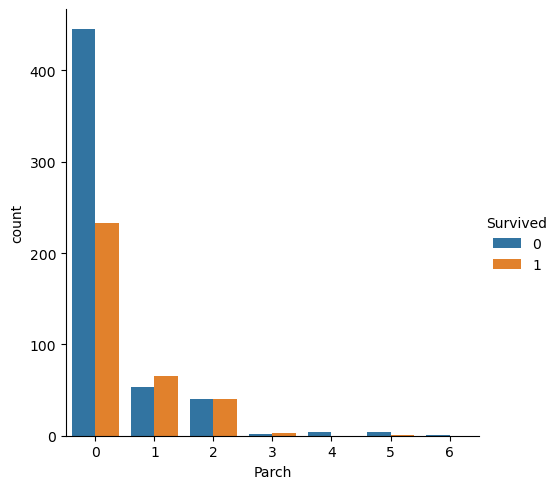

In [11]:
sns.catplot(x ="Parch", hue ="Survived",
kind ="count", data = df)
plt.show()

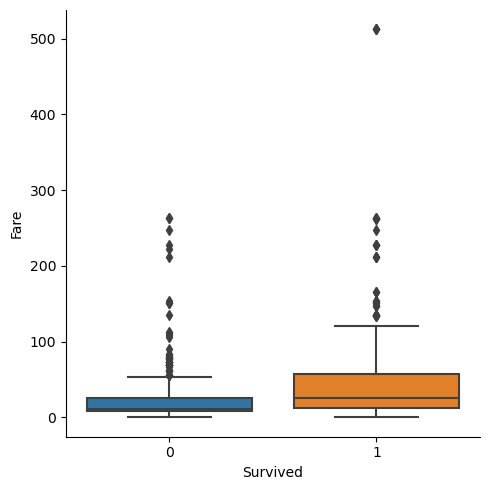

In [12]:
sns.catplot(data=df, x="Survived", y="Fare", kind="box")
plt.show()

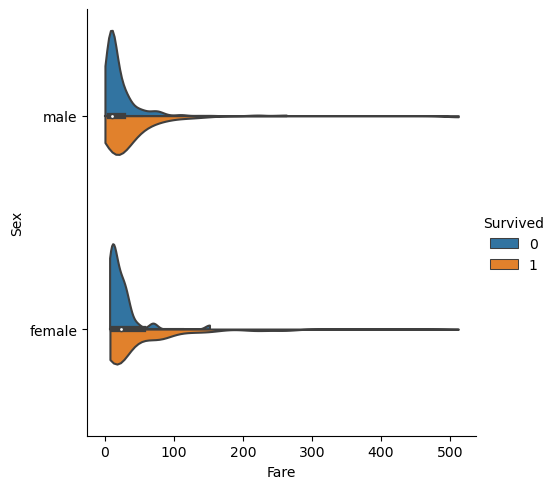

In [13]:
sns.catplot(
    data=df, x="Fare", y="Sex", hue="Survived",
    kind="violin", bw=.25, cut=0, split=True,
)
plt.show()

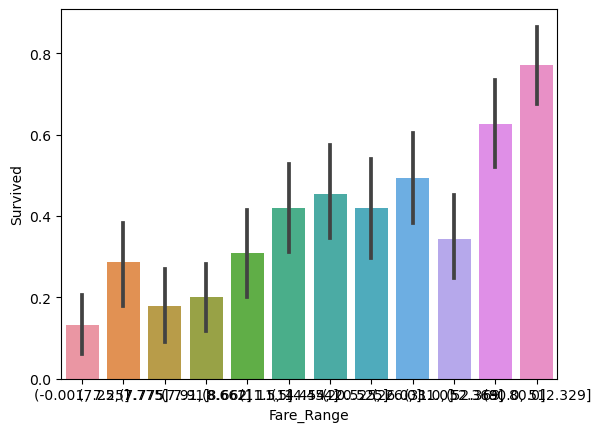

In [14]:
# Divide Fare into bins
df['Fare_Range'] = pd.qcut(df['Fare'], 12)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = df)
plt.show()

C:\Users\xAdmin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


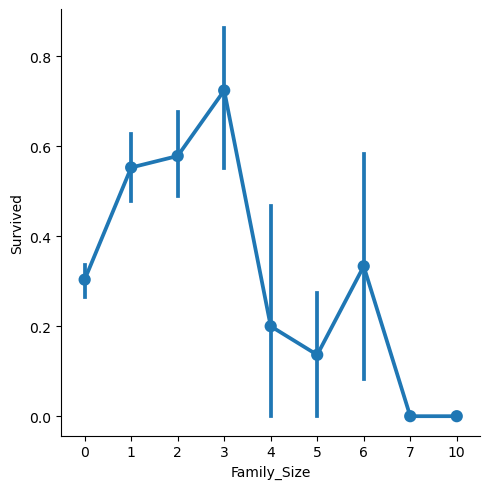

C:\Users\xAdmin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


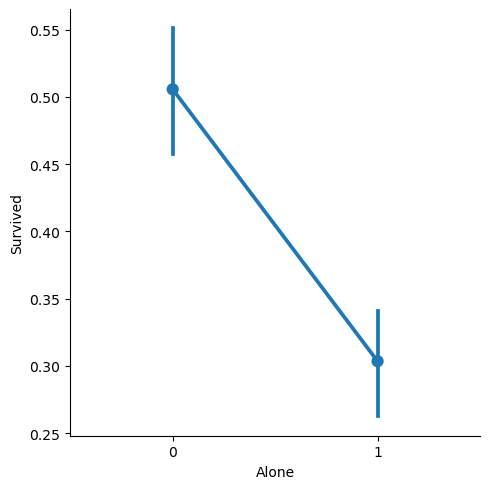

In [15]:
# Adding a column Family_Size
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']
 
# Adding a column Alone
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = df)
plt.show()
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = df)
plt.show()

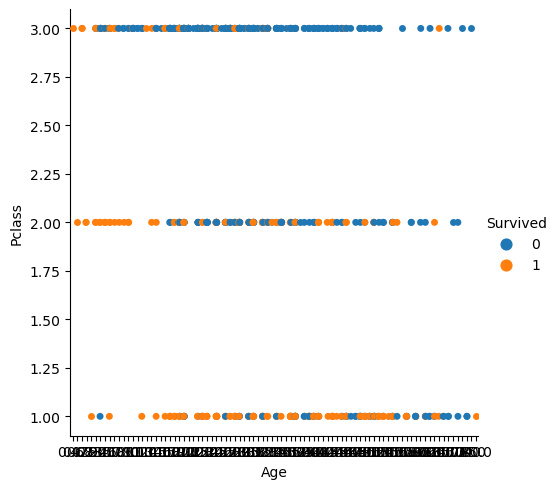

In [16]:
sns.catplot(data=df, x="Age", y="Pclass", hue='Survived')
plt.show()

In [17]:
df.Family_Size.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_Size, dtype: int64

In [18]:
df.Alone.value_counts()

1    537
0    354
Name: Alone, dtype: int64

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare bins,Age bins,Fate,Fare_Range,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,cheap,young adult,Perished,"(-0.001, 7.25]",1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,very expensive,middle age,Lived,"(52.369, 80.0]",1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,moderate,young adult,Lived,"(7.91, 8.662]",0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,very expensive,middle age,Lived,"(52.369, 80.0]",1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,moderate,middle age,Perished,"(7.91, 8.662]",0,1
